The angles of each joints are :  [0.0, 89.95437383551085, -80.16585392203758, 36.99393552054487, 1.1685627291499596, 86.01308157563233]
Computed position: [4.99999677e-01 3.98163225e-04 3.47583072e-09], original position : [0.5, 0, 0]
Computed position (readable) : ['0.50', '0.00', '0.00']
179.95437383551086 0
9.834146077962416 1
126.99393552054488 2
91.16856272914995 3
176.01308157563233 4


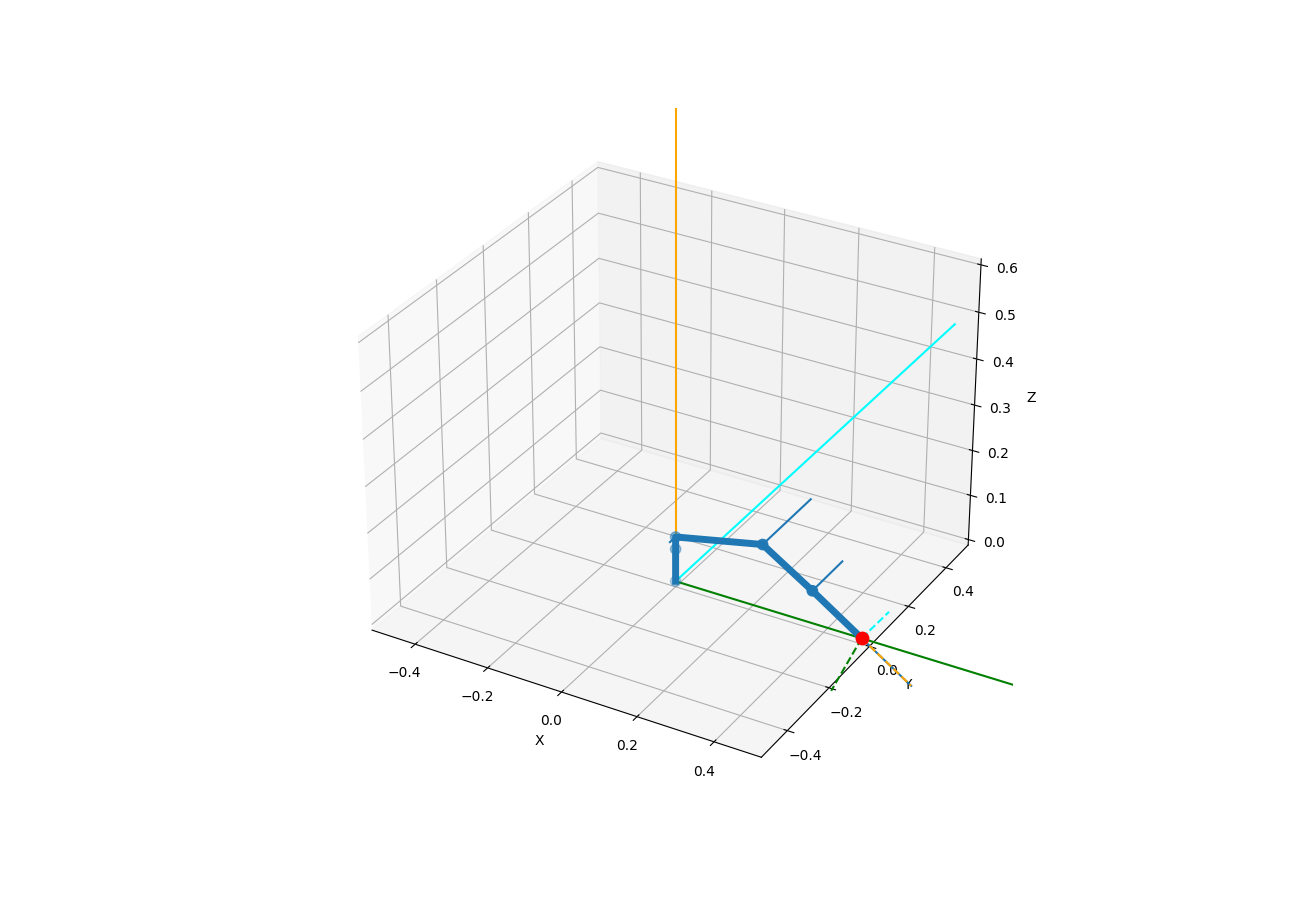

In [5]:
import ikpy.chain
import ikpy.utils.plot as plot_utils



import numpy as np
import time
import math

import ipywidgets as widgets
import serial

# from adafruit_servokit import ServoKit
from time import sleep

# Kit=ServoKit(channels=16)
# servo=6



my_chain = ikpy.chain.Chain.from_urdf_file("AA-pro.urdf",active_links_mask=[False, True, True, True, True, True,])

target_position = [0.5, 0, 0]

target_orientation = [0, 0, 0]

ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
angles=list(map(lambda r:math.degrees(r),ik.tolist()))
print("The angles of each joints are : ", angles)

computed_position = my_chain.forward_kinematics(ik)
print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

# def smooth(ang,servoid):
#     for i in range(int(ang)):
#     #  Kit.servo[servoid].angles=i
    
    
# for i in range(5):
#     smooth(angles[i+1]+90,i)
for i in range(5):
    print(angles[i+1]+90,i)

%matplotlib widget
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()